In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pricing_functions import data_treatment, request, product_pricing
from ys_functions import *

In [33]:
product_database = {}
weeks = 36
all_df = pd.DataFrame([])
all_jsons = []

for week in range(weeks):
    json = request()
    json = data_treatment(request())
    json, product_database = product_pricing(json, product_database)
    all_jsons.append(json)

#### Dataframe - Quantity of products

In [34]:
all_qnt= df_to_analysis(all_jsons=all_jsons, column_name='qnt')
all_qnt.head(10)

,date,week,month,id,prod_0,prod_2,prod_9,prod_10,prod_15,prod_1,prod_4,prod_6,prod_8,prod_3,prod_11,prod_5,prod_7,balance
0,2022-10-20,Week 1,October,lan0lqgfg4wiqq4x1to,49.0,38.0,521.698750,547.442801,1569.064372,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3279.062608
1,2022-11-03,Week 2,November,lan0lqgtdaxhmu6emej,39.0,11.0,673.468398,0.000000,1973.500328,23.0,13.0,21.0,719.0,0.0,0.000000,0.0,0.0,3279.062608
2,2022-11-03,Week 2,November,lan0lqgt2vklux5xzc4,0.0,0.0,15.844445,0.000000,1428.627544,30.0,0.0,44.0,0.0,11.0,650.118662,0.0,0.0,3279.062608
3,2022-11-02,Week 2,November,lan0lqgtbsbqppe039e,0.0,9.0,26.416287,98.445988,2023.065253,0.0,0.0,0.0,243.0,0.0,600.706293,26.0,35.0,3279.062608
4,2022-11-02,Week 2,November,lan0lqgtv2jyn9dr8cr,0.0,0.0,19.802898,223.892411,1958.164395,7.0,0.0,5.0,88.0,0.0,232.359566,45.0,0.0,3279.062608
5,2022-11-02,Week 2,November,lan0lqgtvmup199gwb9,0.0,0.0,0.000000,0.000000,1351.592432,0.0,8.0,3.0,11.0,0.0,0.000000,0.0,0.0,3279.062608
6,2022-11-03,Week 2,November,lan0lqgtlw4rpnipa1,10.0,0.0,328.464636,0.000000,1262.457300,0.0,0.0,41.0,0.0,0.0,331.837983,0.0,41.0,3279.062608
7,2022-11-03,Week 2,November,lan0lqgts8n1l3mye3,0.0,23.0,515.479647,0.000000,1533.030814,39.0,44.0,12.0,0.0,0.0,664.123119,0.0,17.0,3279.062608
8,2022-11-02,Week 2,November,lan0lqgtyn0kkr6s8mp,16.0,0.0,699.399602,801.838543,1991.101256,0.0,8.0,8.0,0.0,0.0,0.000000,0.0,16.0,3279.062608
9,2022-11-02,Week 2,November,lan0lqgtb1e5i0q11n,0.0,0.0,741.868046,0.000000,1279.729077,0.0,11.0,10.0,397.0,0.0,549.583848,40.0,0.0,3279.062608


In [35]:
sum_all_prods = {f'{x}':'sum' for x in all_qnt.columns[4:]}

#### Grouping - Quantity - Week

In [36]:
weekly_qnt= all_qnt.groupby('week', sort=False).agg(sum_all_prods)
weekly_qnt.head()

,prod_0,prod_2,prod_9,prod_10,prod_15,prod_1,prod_4,prod_6,prod_8,prod_3,prod_11,prod_5,prod_7,balance
week,,,,,,,,,,,,,,
Week 1,49.0,38.0,521.698750,547.442801,1569.064372,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3279.062608
Week 2,191.0,122.0,5391.628444,2550.000602,27676.798436,150.0,238.0,258.0,3479.0,27.0,5442.013892,170.0,224.0,55744.064333
Week 3,128.0,91.0,2525.875807,1970.665655,12337.618334,90.0,148.0,128.0,2523.0,175.0,1422.645106,83.0,101.0,22953.438255
Week 4,166.0,276.0,2552.990311,3257.913164,30757.964409,166.0,228.0,260.0,2390.0,147.0,3774.336383,225.0,280.0,55744.064333
Week 5,225.0,225.0,4463.059927,4652.706078,31777.097812,114.0,123.0,171.0,3258.0,178.0,4259.441578,337.0,258.0,62302.189549


#### Grouping - Quantity - Month

In [37]:
monthly_qnt= all_qnt.groupby('month', sort=False).agg(sum_all_prods)
monthly_qnt.head()

,prod_0,prod_2,prod_9,prod_10,prod_15,prod_1,prod_4,prod_6,prod_8,prod_3,prod_11,prod_5,prod_7,balance
month,,,,,,,,,,,,,,
October,554.0,445.0,8255.017161,6834.093101,76597.119720,511.0,308.0,481.0,8245.0,249.0,7539.646467,336.0,473.0,124604.379097
November,903.0,1005.0,16539.384971,15166.498230,134384.035566,906.0,825.0,931.0,16250.0,668.0,17652.429454,753.0,907.0,239371.570371
December,1103.0,1136.0,20686.085328,18138.631847,143629.109769,1089.0,1003.0,1084.0,17191.0,813.0,18481.863979,1434.0,1367.0,318069.072958
January,1075.0,1114.0,17984.139414,15037.721575,100585.379391,1417.0,939.0,924.0,21096.0,1061.0,18256.775475,1017.0,1257.0,278720.321664
February,452.0,564.0,6645.665820,7486.407207,47442.431803,431.0,390.0,573.0,10050.0,490.0,6720.257185,506.0,567.0,134441.566920


In [38]:
monthly_qnt.to_csv('monthly_revenue.csv')

#### DataFrame - Product Price

In [39]:
all_prices= df_to_analysis(all_jsons=all_jsons, column_name='price')
all_prices.head()

,date,week,month,id,prod_0,prod_2,prod_9,prod_10,prod_15,prod_1,prod_4,prod_6,prod_8,prod_3,prod_11,prod_5,prod_7,balance
0,2022-10-20,Week 1,October,lan0lqgfg4wiqq4x1to,90.59,63.98,98.63,70.78,68.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.225009e+08
1,2022-11-03,Week 2,November,lan0lqgtdaxhmu6emej,90.59,63.98,98.63,0.00,68.64,31.04,10.65,76.69,44.31,0.00,0.00,0.00,0.00,1.225009e+08
2,2022-11-03,Week 2,November,lan0lqgt2vklux5xzc4,0.00,0.00,98.63,0.00,68.64,31.04,0.00,76.69,0.00,27.93,99.42,0.00,0.00,1.225009e+08
3,2022-11-02,Week 2,November,lan0lqgtbsbqppe039e,0.00,63.98,98.63,70.78,68.64,0.00,0.00,0.00,44.31,0.00,99.42,7.46,58.84,1.225009e+08
4,2022-11-02,Week 2,November,lan0lqgtv2jyn9dr8cr,0.00,0.00,98.63,70.78,68.64,31.04,0.00,76.69,44.31,0.00,99.42,7.46,0.00,1.225009e+08


In [40]:
all_prices.to_csv('all_prices.csv')

#### Grouping - Price - Week

In [41]:
weekly_price= all_prices.groupby('week', sort=False).agg(sum_all_prods)
weekly_price.head()

,prod_0,prod_2,prod_9,prod_10,prod_15,prod_1,prod_4,prod_6,prod_8,prod_3,prod_11,prod_5,prod_7,balance
week,,,,,,,,,,,,,,
Week 1,90.590000,63.980000,98.63,70.7800,68.64,0.000000,0.0000,0.0000,0.00,0.000000,0.000,0.000000,0.000000,1.225009e+08
Week 2,724.720000,447.860000,1479.45,495.4600,1166.88,217.280000,95.8500,920.2800,487.41,55.860000,1292.460,44.760000,470.720000,2.082514e+09
Week 3,679.425000,383.879981,887.67,424.6800,720.72,155.200000,53.2500,306.7600,310.17,167.580000,298.260,29.840000,294.200000,8.575060e+08
Week 4,1630.620000,1295.594936,2663.01,1751.8050,2625.48,232.799994,143.7750,1150.3500,797.58,335.160000,1789.560,123.090000,794.339998,2.082514e+09
Week 5,3363.153744,1511.527426,5326.02,2627.7075,4401.54,488.879987,119.8125,1898.0775,1196.37,565.582489,2013.255,167.849999,1323.899996,2.327516e+09


#### Grouping - Price - Month

In [42]:
monthly_price=all_prices.groupby('month').agg(sum_all_prods)
monthly_price.head()

,prod_0,prod_2,prod_9,prod_10,prod_15,prod_1,prod_4,prod_6,prod_8,prod_3,prod_11,prod_5,prod_7,balance
month,,,,,,,,,,,,,,
April,9.761899e+03,3.215198e+04,5.442399e+04,2.929228e+04,2.167075e+05,2.684283e+04,2.378650e+03,1.712851e+04,6.260088e+04,5.504200e+03,4.910314e+03,3.349513e+02,1.275524e+04,3.430024e+09
August,4.378269e+05,1.187558e+06,3.250446e+06,1.474646e+06,1.346649e+07,1.651086e+06,1.909549e+05,1.181197e+06,4.616720e+06,3.693436e+05,3.432163e+05,2.661174e+04,9.955679e+05,6.247543e+09
December,1.353548e+07,4.658991e+07,1.221016e+08,6.597398e+07,4.913872e+08,6.215281e+07,5.687176e+06,3.127143e+07,1.680458e+08,1.366440e+07,1.254145e+07,8.915874e+05,3.142286e+07,1.188258e+10
February,3.956797e+07,1.037845e+08,2.835915e+08,1.304560e+08,1.043929e+09,1.338936e+08,9.945546e+06,1.205989e+08,3.823531e+08,2.983861e+07,2.894809e+07,2.172396e+06,7.230011e+07,5.022535e+09
January,4.735761e+07,1.027339e+08,2.230215e+08,1.159745e+08,9.378082e+08,1.695990e+08,1.140087e+07,7.203143e+07,3.228764e+08,2.833466e+07,2.524987e+07,1.894259e+06,7.969759e+07,1.041257e+10


#### Consolidate (Price x Quantity)

#### Consolidate - Week

In [43]:
df_consolidate_week = pd.DataFrame([])
df_consolidate_week = consolidate(weekly_qnt, weekly_price, df_consolidate_week)
df_consolidate_week.head()

,prod_0,prod_2,prod_9,prod_10,prod_15,prod_1,prod_4,prod_6,prod_8,prod_3,prod_11,prod_5,prod_7,balance
week,,,,,,,,,,,,,,
Week 1,4438.910000,2431.240000,5.145515e+04,3.874800e+04,1.077006e+05,0.000000,0.0000,0.000000,0.00,0.00000,0.000000e+00,0.000000,0.000000,4.016880e+11
Week 2,138421.520000,54638.920000,7.976645e+06,1.263423e+06,3.229550e+07,32592.000000,22812.3000,237432.240000,1695699.39,1508.22000,7.033585e+06,7609.200000,105441.280000,1.160878e+14
Week 3,86966.399993,34933.078293,2.242144e+06,8.369023e+05,8.891968e+06,13968.000000,7881.0000,39265.280000,782558.91,29326.50000,4.243181e+05,2476.720000,29714.200000,1.968271e+13
Week 4,270682.919975,357584.202438,6.798639e+06,5.707229e+06,8.075442e+07,38644.798933,32780.7000,299091.000000,1906216.20,49268.52000,6.754401e+06,27695.249951,222415.199320,1.160878e+14
Week 5,756709.592346,340093.670797,2.377035e+07,1.222595e+07,1.398682e+08,55732.318462,14736.9375,324571.252497,3897773.46,100673.68309,8.575342e+06,56565.449766,341566.198955,1.450094e+14


#### Consolidate - Month

In [44]:
df_consolidate_month = pd.DataFrame([])
df_consolidate_month= consolidate(monthly_qnt, monthly_price, df_consolidate_month)
df_consolidate_month.head()

,prod_0,prod_2,prod_9,prod_10,prod_15,prod_1,prod_4,prod_6,prod_8,prod_3,prod_11,prod_5,prod_7,balance
month,,,,,,,,,,,,,,
April,3.192141e+06,1.562586e+07,3.869139e+08,1.785440e+08,1.061652e+10,8.562864e+06,7.897117e+05,5.635280e+06,2.146584e+08,1.370546e+06,1.973689e+07,7.703879e+04,4.655663e+06,3.149234e+14
August,2.946575e+08,5.332137e+08,3.563446e+10,1.331721e+10,7.172333e+11,1.003860e+09,1.281307e+08,7.760463e+08,6.418626e+10,2.507843e+08,3.487018e+09,1.724441e+07,7.715651e+08,1.044790e+15
December,1.492964e+10,5.292613e+10,2.525804e+12,1.196678e+12,7.057751e+13,6.768441e+10,5.704238e+09,3.389823e+10,2.888875e+12,1.110915e+10,2.317894e+11,1.278536e+09,4.295504e+10,3.779482e+15
February,1.788472e+10,5.853447e+10,1.884654e+12,9.766466e+11,4.952654e+13,5.770812e+10,3.878763e+09,6.910316e+10,3.842649e+12,1.462092e+10,1.945386e+11,1.099233e+09,4.099416e+10,6.752375e+14
January,5.090943e+10,1.144455e+11,4.010849e+12,1.743992e+12,9.432980e+13,2.403217e+11,1.070542e+10,6.655705e+10,6.811400e+12,3.006307e+10,4.609812e+11,1.926462e+09,1.001799e+11,2.902196e+15


In [45]:
df_consolidate_month.to_csv('df_consolidate_month.csv')

#### Consolidate to Dashboard

In [46]:
final_consolidate = df_consolidate_month.T
final_consolidate['balance'] = balance_product(final_consolidate)
final_consolidate.drop('balance', inplace=True)
final_consolidate = final_consolidate.reset_index()
final_consolidate.rename(columns={'index':'product'}, inplace=True)
final_consolidate.to_csv('final_consolidate.csv')

In [47]:
final_consolidate.head()

month,product,April,August,December,February,January,July,June,March,May,November,October,September,balance
0,prod_0,3.192141e+06,2.946575e+08,1.492964e+10,1.788472e+10,5.090943e+10,3.869556e+07,5.349776e+07,4.043435e+06,1.026281e+07,5.068297e+09,9.867879e+08,3.444368e+08,9.052766e+10
1,prod_2,1.562586e+07,5.332137e+08,5.292613e+10,5.853447e+10,1.144455e+11,9.168704e+07,1.580714e+08,3.246680e+06,3.067086e+07,2.039326e+10,2.293182e+09,1.024524e+09,2.504496e+11
2,prod_9,3.869139e+08,3.563446e+10,2.525804e+12,1.884654e+12,4.010849e+12,2.041957e+09,4.808646e+09,6.298162e+07,8.743451e+08,6.089061e+11,1.108583e+11,7.241844e+10,9.257300e+12
3,prod_10,1.785440e+08,1.331721e+10,1.196678e+12,9.766466e+11,1.743992e+12,1.420079e+09,2.825198e+09,3.250652e+07,7.013447e+08,3.335244e+11,4.081586e+10,1.954724e+10,4.329679e+12
4,prod_15,1.061652e+10,7.172333e+11,7.057751e+13,4.952654e+13,9.432980e+13,1.031619e+11,1.574015e+11,1.206787e+09,2.966126e+10,2.113791e+13,3.894334e+12,1.299386e+12,2.417848e+14


#### Dict of DataFrames

In [48]:
dict_dfs = {'week':{'price':weekly_price,'qnt':weekly_qnt, 'consolidate':df_consolidate_week}, \
    'month':{'price':monthly_price,'qnt':monthly_qnt, 'consolidate':df_consolidate_month}}

#### Analysis

##### Monthly Quantities

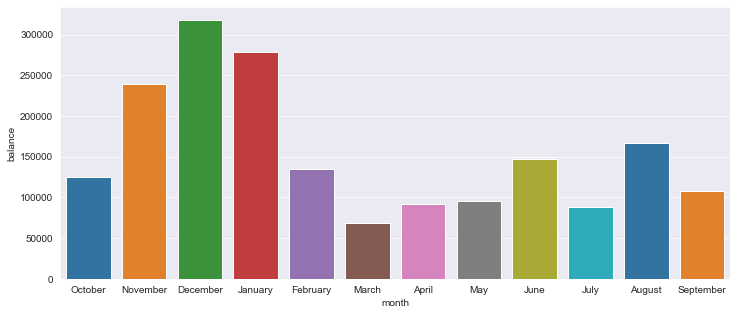

In [49]:
print_barplot(x=monthly_qnt.index, y=monthly_qnt['balance'])

In [50]:
week_per_month = all_qnt.groupby(['month', 'week']).agg({'balance':'sum'})
week_per_month.head()

balance
month    week                  
April    Week 13   36069.688686
         Week 14   55744.064333
August   Week 22  114767.191274
         Week 23   52465.001725
December Week 31   95092.815627

#### Quantity of requests on the months with maximum and minimum balance

In [51]:
min_month = monthly_qnt['balance'].min()
min_month = monthly_qnt[monthly_qnt['balance']==min_month].index[0]
max_month = monthly_qnt['balance'].max()
max_month = monthly_qnt[monthly_qnt['balance']==max_month].index[0]

In [52]:
min_weeks = len(week_per_month.loc[min_month,'balance'])
max_weeks = len(week_per_month.loc[max_month,'balance'])

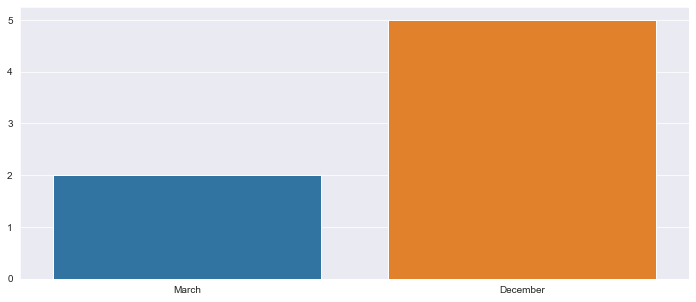

In [53]:
print_barplot(x=[min_month, max_month], y=[min_weeks,max_weeks])

##### Monthly Quantities per Request

In [54]:
def join_all_ratios(all_prices:pd.DataFrame, monthly_price:dict, dict_dfs:dict, period:str, variable: str, report:bool):
    all_ratios = []
    for unity in dict_dfs[period][variable].index:
        ratio = calc_ratio(all_prices=all_prices, dict_dfs=dict_dfs,period=period,variable=variable, unity_of_period=unity)
        all_ratios.append(ratio)
    if report:
        return all_ratios
    else:
        fig, ax = plt.subplots(figsize=(12, 5))
        sns.lineplot(x=monthly_price.index, y=all_ratios)
        sns.set_style('darkgrid')

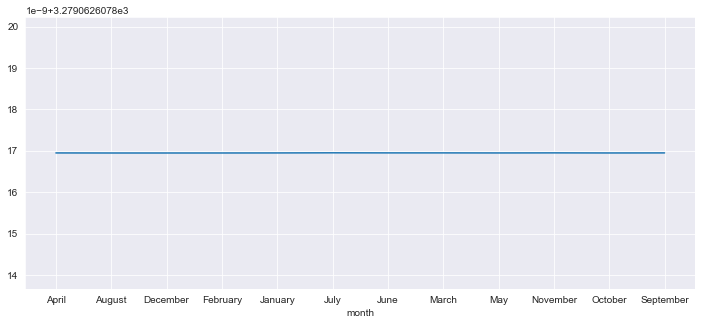

In [55]:
qnt_ratios = join_all_ratios(all_prices=all_prices, monthly_price=monthly_price,dict_dfs=dict_dfs, period='month', variable='qnt', report=True)
join_all_ratios(all_prices=all_prices, monthly_price=monthly_price, dict_dfs=dict_dfs, period='month', variable='qnt', report=False)

In [56]:
price_ratios = join_all_ratios(all_prices=all_prices, monthly_price=monthly_price,dict_dfs=dict_dfs,period='month', variable='price', report=True)

#### Consolidate (Price x Quantity) per Resquest

401687963447.0749


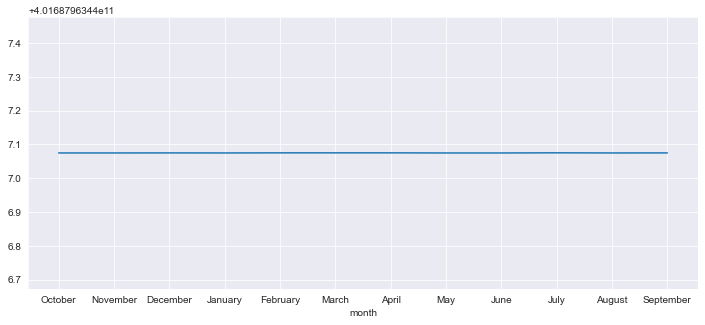

In [57]:
consolidate_per_transaction(dict_dfs=dict_dfs, period='month', qnt=qnt_ratios, price=price_ratios)

#### Week - Quantities

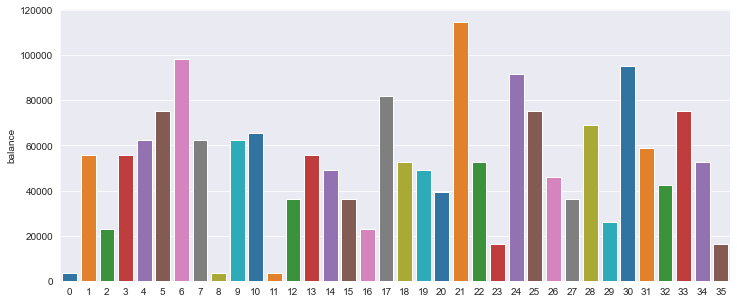

In [58]:
print_barplot(x=[x for x in range(len(weekly_qnt.index))], y=weekly_qnt['balance'])

#### Week - Consolidate

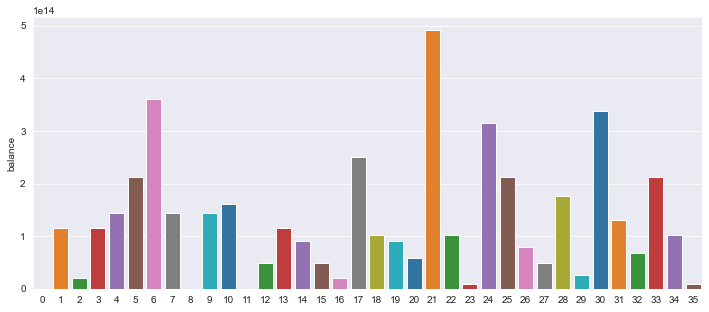

In [59]:
print_barplot(x=[x for x in range(len(df_consolidate_week.index))], y=df_consolidate_week['balance'])

##### Which type sold the best in quantitative terms?

In [60]:
monthly_qnt_to_compare = monthly_qnt.T
monthly_qnt_to_compare=monthly_qnt_to_compare.drop('balance')
prods_type=['unity' if (str(monthly_qnt_to_compare.loc[prod, monthly_qnt_to_compare.columns[0]]).split('.')[1]=='0') else 'kg' \
    for prod in monthly_qnt_to_compare.index]

Index(['kg', 'unity'], dtype='object', name='type')

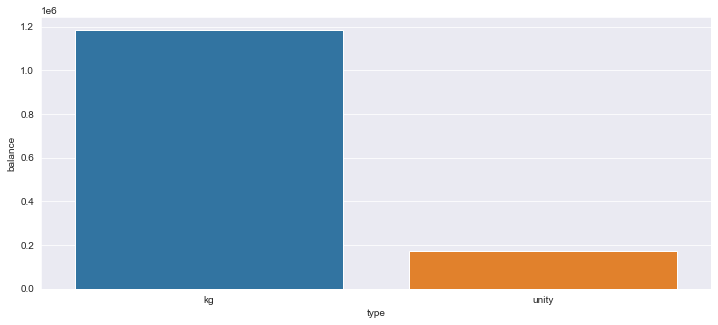

In [61]:
barplot_type(df=monthly_qnt, type_column=prods_type)

#### Adding the values of the unit prices per type

Index(['kg', 'unity'], dtype='object', name='type')

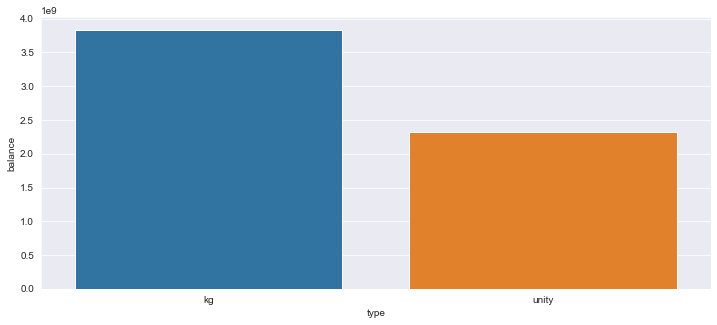

In [62]:
barplot_type(df=monthly_price, type_column=prods_type)

#### Amount per type of product

Index(['kg', 'unity'], dtype='object', name='type')

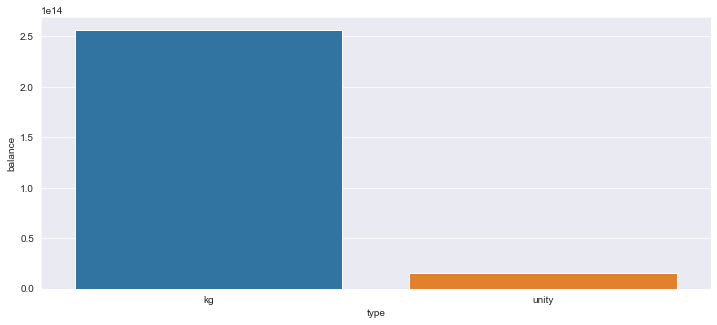

In [63]:
barplot_type(df_consolidate_month, type_column=prods_type)